In [1]:
import pandas as pd
import requests as req
import bs4

# Web scraper for Indeed Web page

## Creating headers

In [2]:
url = 'https://cr.indeed.com/jobs?q=Developer&l=Costa+Rica'
base_link = 'https://cr.indeed.com'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.142 Safari/537.36'
headers = {
    'User-Agent': user_agent,
}

## Using requests library

In [3]:
response = req.get(url, headers=headers)
response.ok #200

True

## Creating and BeautifulSoup object base on response obj

In [4]:
jobs_soup = bs4.BeautifulSoup(response.text, 'html.parser')

In [5]:
response.text[:400]

'<!DOCTYPE html>\n<html lang="es" dir="ltr">\n<head>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8">\n<script type="text/javascript" src="/s/872b482/es_CR.js"></script>\n<link href="/s/b219863/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link rel="alternate" type="application/rss+xml" title="Trabajo - Developer en Costa Rica - Ofertas Empleo" href="http://cr.indeed.com/rss?q'

## Job selector

In [6]:
jobs_soup.select('.jobsearch-SerpJobCard')[0].select('.title')[0].select('.jobtitle')[0].text.strip()

'Wordpress Developer - Senior - Full Stack'

## Date selector

In [7]:
jobs_soup.select('.jobsearch-SerpJobCard .jobsearch-SerpJobCard-footer .date')[:5]

[<span class="date">hace 6 días</span>,
 <span class="date">hace 5 días</span>,
 <span class="date">30+ days ago</span>,
 <span class="date">hace 4 días</span>,
 <span class="date">30+ days ago</span>]

## Iterating for every job and buid an object

In [8]:
jobs_soup.select('.jobsearch-SerpJobCard')[0].select('.title')[0].select('.jobtitle')[0].text.strip()

'Wordpress Developer - Senior - Full Stack'

In [9]:
jobs_soup.select('.jobsearch-SerpJobCard')[0];

In [10]:
job_list = [{
        'title': job.select('.title')[0].select('.jobtitle')[0].text.strip(), 
        'company': job.select('.company')[0].text.strip(),
        'location': job.select('.location')[0].text.strip(),
        'link':'{}{}'.format(base_link, job.select('.title')[0].select('.jobtitle')[0]['href']) ,
        #'date': job.select('.jobsearch-SerpJobCard-footer .date')[0].text,
        } for job in jobs_soup.select('.jobsearch-SerpJobCard')]
job_list[:3]

[{'title': 'Wordpress Developer - Senior - Full Stack',
  'company': 'Confidential',
  'location': 'San José, Provincia de San José',
  'link': 'https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0C42uWlTcvQuSvYOtAav8PzwEmyqfcTD3ltHWCdPLhdUYorS3opGZQvGm0d7zjEri2TF-bveZjPY36Yp6PvrnjIVoYoo6PeuoRWkw70Jaj2LlZUkADIviLskz246y2Lp7tuLFfqtnNFxT3VrI_uXwlNB7ndpPJoS1XivDqv_TinQinoUNUYAhZrbgZMJR61cdJS_-C0pFpa5B2aCRbCJYa3ZqNCAxhCbTkcT90kOXW1NZbVUFHcmakjplBSKMDB9lkgpSn-mfgSI2DSAslXvlCsQl1R19ShvorgE8j_Qn__m9HUG5RNOWoWzT-VwoEzMyx6krhH3SH6Rsa1LnlPTheaYo9KULmMbjrGB_f-EqQH-YKs0DY-AOJW0_0yRMtSqG7PYA7mHeXTyDiNRAYL3zV3XKilFqkP09IYEEnn1se3J18wTAFDvb4_&p=0&fvj=1&vjs=3'},
 {'title': 'WordPress Developer (Junior)',
  'company': 'Debugger Technology Solutions',
  'location': 'Curridabat, Provincia de San José',
  'link': 'https://cr.indeed.com/rc/clk?jk=3cb3503d625c9a94&fccid=1dd6fadbcd0d89b7&vjs=3'},
 {'title': 'Data Developer',
  'company': 'Wind River',
  'location': 'San José, Provincia de San José',
  'link':

## Visit every job 

In [11]:
base_link = 'https://cr.indeed.com'
job_links = []
for job in job_list:
    job_links.append(job['link'])

## Visition job at 0 pos

In [12]:
response2 = req.get(job_links[0].__str__())
response2.ok

True

In [13]:
jobs_soup2 = bs4.BeautifulSoup(response2.text, 'html.parser')

## Company & location selector

In [14]:
jobs_soup2.select('.jobsearch-InlineCompanyRating')[0].text

'Confidential-San José, Provincia de San José'

## Job description

In [15]:
jobs_soup2.select('#jobDescriptionText')[0].text[:300]

"About YouWe're looking for a forward thinking, engaging, Full Stack Senior Wordpress Developer with the ability to work closely with our design & marketing teams and manage multiple clients WP sites.You will live and breathe development and will be able to demonstrate your ability solve complex prob"

# Dealing with pagination

## Get next pag url

In [16]:
# Get last number page in the pagination field and then get the url from that particular number anchor object
_next = jobs_soup.select('.pagination a')[-1]['href']
display(_next)

'/jobs?q=Developer&l=Costa+Rica&start=10'

In [17]:
# URL is incomplete, concat with base url
next_link = f'{base_link}/jobs?q=Developer&l=Costa+Rica&start=230'
display(next_link)

'https://cr.indeed.com/jobs?q=Developer&l=Costa+Rica&start=230'

# Read CSV Generated file

In [25]:
df = pd.read_csv(r'..\data\crjobs.csv')
df.head(10)

,Unnamed: 0,company,description,link,location,title
0,0,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",Wordpress Developer - Senior - Full Stack
1,1,Wind River,Position Title: Data Developer\nLocation: Cost...,https://cr.indeed.com/rc/clk?jk=db6ad71bdea13e...,"San José, Provincia de San José",Data Developer
2,2,Debugger Technology Solutions,Opciones de Contrato: (medio tiempo - tiempo c...,https://cr.indeed.com/rc/clk?jk=3cb3503d625c9a...,"Curridabat, Provincia de San José",WordPress Developer (Junior)
3,3,Accenture,Accenture solves our clients' toughest challen...,https://cr.indeed.com/rc/clk?jk=9ee85b4d7614c1...,"San José, Provincia de San José",Front-End Developer Analyst
4,4,MBC Developers,Perfil del puesto: Se requiere Ingeniero(a) de...,https://cr.indeed.com/rc/clk?jk=4591ca5da45148...,"Montes de Oca, Provincia de San José",Junior Developer
5,5,Perfiles Tecnológicos,"The ideal candidate is a self- motivated, mult...",https://cr.indeed.com/rc/clk?jk=05fd6bc019bb0e...,"San José, Provincia de San José",Azure Backend Developer
6,6,4Geeks Technologies,Your role would be to provide support to a sen...,https://cr.indeed.com/rc/clk?jk=f50e11f2dc0065...,"San José, Provincia de San José",Jr. Drupal Developer
7,7,Accenture,Accenture solves our clients' toughest challen...,https://cr.indeed.com/rc/clk?jk=3e216ade39e58a...,"San José, Provincia de San José",Web Developer Associate
8,8,ServicePro,We are rapidly growing software company lookin...,https://cr.indeed.com/rc/clk?jk=c8bf502c8c987e...,"San José, Provincia de San José",Developer
9,9,NTT DATA Services,"Req ID: 59667\n\nAt NTT DATA Services, we know...",https://cr.indeed.com/rc/clk?jk=cc1f81cac44d1c...,"San José, Provincia de San José",Cognos Developer


# Questions

In [89]:
forpie = []

In [27]:
# dataframe shape
df.shape

(261, 6)

In [28]:
df['title'].value_counts()

Wordpress Developer - Senior - Full Stack                24
Java Developer                                            5
Senior Java Developer                                     4
Business Intelligence Developer                           3
Front End Developer                                       3
Web Developer                                             3
RPA Configurator                                          2
Analista de Sistemas                                      2
Sr. Python Developer - Costa Rica                         2
Microsoft Dynamics CRM Developer                          2
Senior Web Developer                                      2
Software Developer Engineer (full stack)                  2
Javascript Full Stack Developer                           2
.NET Full Stack Developer                                 2
Senior Frontend Engineer                                  2
Systems Analyst                                           2
Reporting Data Analyst                  

In [63]:
df['title'] = df['title'].str.upper() 

In [90]:
java = df[df['title'].str.contains('JAVA', regex=True)]
display(java.shape)
display(java)
forpie.append(('JAVA', java.shape[0]))

(32, 6)

,Unnamed: 0,company,description,link,location,title
15,15,Intertec International,Roles/Responsibilities - Under the supervision...,https://cr.indeed.com/company/Intertec-Interna...,"Heredia, Provincia de Heredia",JAVA DEVELOPER INTERNSHIPS AVAILABLE!
36,36,Micro Focus,"Job Description:\n\nAt Micro Focus, everything...",https://cr.indeed.com/rc/clk?jk=7756501af2f112...,"San José, Provincia de San José",JAVA DEVELOPER
52,52,Intertec International,"Description:\nUnder supervision, develop detai...",https://cr.indeed.com/rc/clk?jk=eb16f70182770d...,"Heredia, Provincia de Heredia",JAVA DEVELOPER
66,66,World Fuel,"At World Fuel Services, our employees are the ...",https://cr.indeed.com/rc/clk?jk=35c3a722236cbe...,"San José, Provincia de San José",JAVA SPRING DEVELOPER
82,82,World Fuel,"At World Fuel Services, our employees are the ...",https://cr.indeed.com/rc/clk?jk=35c3a722236cbe...,"San José, Provincia de San José",JAVA SPRING DEVELOPER
85,85,3M,"Role : Developer\nSkill : HTML, CSS, Javascrip...",https://cr.indeed.com/rc/clk?jk=1026d55dad883c...,"La Asunción, Provincia de Heredia",JAVA FRONT END DEVELOPER
93,93,Micro Focus,"Job Description:\n\nAt Micro Focus, everything...",https://cr.indeed.com/rc/clk?jk=97e99cb5405f18...,"Heredia, Provincia de Heredia",JAVASCRIPT FULL STACK DEVELOPER
96,96,EX2 Outcoding,Background:\n\nMinimum 3 years experience deve...,https://cr.indeed.com/rc/clk?jk=20166a85923701...,Costa Rica,JAVA DEVELOPER
99,99,Gorilla Logic,Full-time employment with Gorilla Logic\nWork ...,https://cr.indeed.com/rc/clk?jk=c5c80bba9aef7c...,"San José, Provincia de San José",MID JAVA/MULE DEVELOPER
100,100,Excel SoftSources,Job Information\nJob Opening ID8\nCitySan Pedr...,https://cr.indeed.com/rc/clk?jk=6841d360ab20cd...,"San Pedro, Provincia de San José",JAVA ENGINEERS


In [76]:
net = df[df['title'].str.contains('c#|C#|NET|DOT', regex=True)]
display(net.shape)
display(net)
forpie.append({'NET': net.shape[0]})

(15, 6)

,Unnamed: 0,company,description,link,location,title
46,46,OPEN SYSTEMS INC,The ideal candidate for this position is comfo...,https://cr.indeed.com/rc/clk?jk=b18a5c33e93ce9...,"Mata Redonda, Provincia de San José",C# DEVELOPER
123,123,ParadigmCR,Experienced .Net developer\n\nStrong knowledge...,https://cr.indeed.com/rc/clk?jk=2b8c53867eb0ab...,"San José, Provincia de San José",.NET FULL STACK DEVELOPER
125,125,"Fiserv, Inc.",What does a great Mid Software Developer Engin...,https://cr.indeed.com/rc/clk?jk=ef583e126be206...,"Tres Ríos, Provincia de Cartago",MID SOFTWARE DEVELOPER ENGINEER (.NET DEV)
160,160,Excel SoftSources,Job Information\nJob Opening ID3\nJob Descript...,https://cr.indeed.com/rc/clk?jk=5d73ec685399a3...,"San Pedro, Provincia de San José",MID LEVEL .NET DEVELOPERS
161,161,ParadigmCR,Experienced .Net developer\n\nStrong knowledge...,https://cr.indeed.com/rc/clk?jk=2b8c53867eb0ab...,"San José, Provincia de San José",.NET FULL STACK DEVELOPER
190,190,Cheetah Digital,Cheetah Digital is hiring Senior .Net Develope...,https://cr.indeed.com/rc/clk?jk=9646f39afc4bed...,"Lagunilla, Provincia de Heredia",SENIOR .NET DEVELOPER
193,193,Growth Acceleration Partners,Bachelor’s degree in Computer Science or relat...,https://cr.indeed.com/rc/clk?jk=5595d54d341351...,"San José, Provincia de San José",BILINGUAL .NET DEVELOPER
204,204,Sysde,Objetivo del Puesto: Desarrollo de programas o...,https://cr.indeed.com/rc/clk?jk=f48ff72315bc51...,"Heredia, Provincia de Heredia",SENIOR FULL STACK DEVELOPER.NET
213,213,Growth Acceleration Partners,Application Support Developer General Descript...,https://cr.indeed.com/rc/clk?jk=c4d8539a2de7bb...,Costa Rica,.NET ENGINEER
219,219,Experian,Experian Automotive is seeking a software deve...,https://cr.indeed.com/rc/clk?jk=47c3cd663a77a9...,Costa Rica,SENIOR SOFTWARE DEVELOPER (.NET/SQL/ETL)


In [109]:
js = df[df['title'].str.contains('JS|JAVASCRIPT|ANGULAR|VUE|REACT', regex=True)]
display(js.shape)
display(js)
forpie.append(('JS', js.shape[0]))

(15, 6)

,Unnamed: 0,company,description,link,location,title
22,22,CreativeDrive LATAM,Overview\nWe are looking for a great JavaScrip...,https://cr.indeed.com/rc/clk?jk=01933ee8b33022...,"San José, Provincia de San José",REACT DEVELOPER
61,61,"Modus Create, Inc.","You are a forward thinking, creative problem s...",https://cr.indeed.com/rc/clk?jk=203eeeea051f01...,"San José, Provincia de San José","SENIOR FRONT END DEVELOPER ( JS, REACTJS): COS..."
93,93,Micro Focus,"Job Description:\n\nAt Micro Focus, everything...",https://cr.indeed.com/rc/clk?jk=97e99cb5405f18...,"Heredia, Provincia de Heredia",JAVASCRIPT FULL STACK DEVELOPER
103,103,Micro Focus,"Job Description:\n\nAt Micro Focus, everything...",https://cr.indeed.com/rc/clk?jk=97e99cb5405f18...,"Heredia, Provincia de Heredia",JAVASCRIPT FULL STACK DEVELOPER
112,112,GlobalLogic,"Create application by developing, implementing...",https://cr.indeed.com/rc/clk?jk=e102bca105a1dc...,"San José, Provincia de San José",SOFTWARE DEVELOPER JOB ID: SDJS 2018
120,120,"Modus Create, Inc.","You are a forward thinking, creative problem s...",https://cr.indeed.com/rc/clk?jk=203eeeea051f01...,"San José, Provincia de San José","SENIOR FRONT END DEVELOPER ( JS, REACTJS): COS..."
124,124,GlobalLogic,"Create application by developing, implementing...",https://cr.indeed.com/rc/clk?jk=e102bca105a1dc...,"San José, Provincia de San José",SOFTWARE DEVELOPER JOB ID: SDJS 2018
171,171,Growth Acceleration Partners,The candidate must be comfortable working hour...,https://cr.indeed.com/rc/clk?jk=d753690f63fdd9...,Provincia de Cartago,FULLSTACK JAVASCRIPT DEVELOPER
189,189,Growth Acceleration Partners,The candidate must be comfortable working hour...,https://cr.indeed.com/rc/clk?jk=d753690f63fdd9...,Provincia de Cartago,FULLSTACK JAVASCRIPT DEVELOPER
196,196,nocompany,"UST - Global\nCosta Rica, Heredia\nExtranjero\...",https://cr.indeed.com/rc/clk?jk=57ef12ed81d824...,"Heredia, Provincia de Heredia",ANGULAR WEB DEVELOPER


In [93]:
python = df[df['title'].str.contains('PYTHON', regex=True)]
display(python.shape)
display(python)
forpie.append(('PYTHON', python.shape[0]))

(3, 6)

,Unnamed: 0,company,description,link,location,title
155,155,SmileDirectClub,"Overview\nWe’re SmileDirectClub, and we believ...",https://cr.indeed.com/rc/clk?jk=860f25039bb9a7...,Provincia de Alajuela,SR. PYTHON DEVELOPER - COSTA RICA
172,172,SmileDirectClub,"Overview\nWe’re SmileDirectClub, and we believ...",https://cr.indeed.com/rc/clk?jk=860f25039bb9a7...,Provincia de Alajuela,SR. PYTHON DEVELOPER - COSTA RICA
254,254,SalsaMobi,Job Description\n\nEssential Duties and Respon...,https://cr.indeed.com/rc/clk?jk=08ad027ad3ff74...,"San José, Provincia de San José",SENIOR / LEAD PYTHON SOFTWARE ENGINEER


In [95]:
wordpress = df[df['title'].str.contains('WORDPRESS', regex=True)]
display(wordpress.shape)
display(wordpress)
forpie.append(('WORDPRESS', wordpress.shape[0]))

(26, 6)

,Unnamed: 0,company,description,link,location,title
0,0,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
2,2,Debugger Technology Solutions,Opciones de Contrato: (medio tiempo - tiempo c...,https://cr.indeed.com/rc/clk?jk=3cb3503d625c9a...,"Curridabat, Provincia de San José",WORDPRESS DEVELOPER (JUNIOR)
21,21,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
32,32,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
43,43,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
54,54,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
65,65,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
76,76,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
87,87,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK
98,98,Confidential,"About YouWe're looking for a forward thinking,...",https://cr.indeed.com/pagead/clk?mo=r&ad=-6NYl...,"San José, Provincia de San José",WORDPRESS DEVELOPER - SENIOR - FULL STACK


In [110]:
forpie

[('JAVA', 32), ('PYTHON', 3), ('WORDPRESS', 26), ('JS', 15)]

In [112]:
distro = pd.DataFrame([{
     'languages' : item[0],
     'qty' : item[1]
  } for item in forpie])
distro

,languages,qty
0,JAVA,32
1,PYTHON,3
2,WORDPRESS,26
3,JS,15


In [ ]:
distro.set_index('languages', inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019352D1C748>],
      dtype=object)

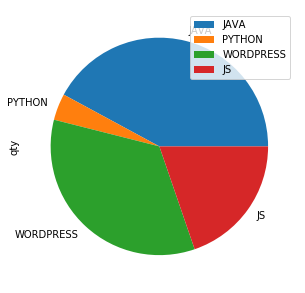

In [121]:
distro.plot.pie(y='qty', subplots=True,figsize=(5, 5))

In [71]:
df['location'].value_counts()

San José, Provincia de San José         128
Heredia, Provincia de Heredia            56
Costa Rica                               21
Escazú, Provincia de San José             6
Lagunilla, Provincia de Heredia           6
San Pedro, Provincia de San José          6
Provincia de Alajuela                     5
San Rafael, Provincia de San José         5
Tres Ríos, Provincia de Cartago           5
Montes de Oca, Provincia de San José      4
Alajuela, Provincia de Alajuela           4
Provincia de Cartago                      3
San Joaquín, Provincia de Heredia         2
San Antonio, Provincia de Heredia         2
La Asunción, Provincia de Heredia         2
Liberia, Provincia de Guanacaste          2
Santa Ana, Provincia de San José          2
Curridabat, Provincia de San José         1
Mata Redonda, Provincia de San José       1
Name: location, dtype: int64

In [72]:
df['company'].value_counts()

Confidential                     24
Accenture                        11
Gorilla Logic                     8
Fiserv, Inc.                      8
NTT DATA Services                 8
Equifax                           7
Growth Acceleration Partners      7
Empleos.net                       6
World Fuel                        5
Amzn Support Srvcs Costa Rica     5
Neustar, Inc.                     5
Micro Focus                       5
Experian                          5
Syniverse                         5
MBC Developers                    4
SmileDirectClub                   4
Open Source Consulting            4
Premier Group                     3
Excel SoftSources                 3
ParadigmCR                        3
CreativeDrive LATAM               3
Log(n) LLC                        3
Janeiro Digital                   3
nocompany                         3
Q6Cyber                           3
Kareo Inc                         3
Mobilize                          3
Qwinix                      